Comparing the JWST and HST visibility windows for T-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u

import astropy.constants as const
from astropy.time import Time


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
ra = 346.6265
dec = -5.0435

In [3]:
# jvis = Table.read('T1_jwst_vis.dat', format='ascii.basic')
# import jwst_gtvt


In [4]:
jvis = np.genfromtxt('T1_jwst_vis.dat', dtype =None, names=True, skip_header=8, skip_footer=407, encoding=None)

In [5]:
jvis

array([('2020-06-01', '2020-07-23', 52.  , 247.27466, 246.71194, 346.6265, -5.0435),
       ('2020-10-24', '2020-12-13', 50.  ,  68.00002,  67.12702, 346.6265, -5.0435),
       ('2021-06-01', '2021-07-23', 52.  , 247.29551, 246.70971, 346.6265, -5.0435),
       ('2021-10-24', '2021-12-13', 50.  ,  68.00619,  67.11052, 346.6265, -5.0435),
       ('2022-06-01', '2022-07-23', 52.  , 247.31714, 246.70193, 346.6265, -5.0435),
       ('2022-10-24', '2022-12-13', 50.  ,  68.00838,  67.09516, 346.6265, -5.0435),
       ('2023-06-01', '2023-07-23', 52.09, 247.3387 , 246.68672, 346.6265, -5.0435),
       ('2023-10-24', '2023-12-13', 49.95,  68.00381,  67.08251, 346.6265, -5.0435)],
      dtype=[('Start', '<U10'), ('End', '<U10'), ('Duration', '<f8'), ('Start_1', '<f8'), ('End_1', '<f8'), ('RA', '<f8'), ('Dec', '<f8')])

In [6]:
start = Time(jvis['Start'], format='iso',out_subfmt='date', scale='utc')
end = Time(jvis['End'], format='isot',out_subfmt='date', scale='utc')
start

<Time object: scale='utc' format='iso' value=['2020-06-01' '2020-10-24' '2021-06-01' '2021-10-24' '2022-06-01'
 '2022-10-24' '2023-06-01' '2023-10-24']>

In [7]:
t1_starts = Time(['2022-10-09', '2023-09-28'], format='iso',out_subfmt='date', scale='utc')
t1_ends = Time(['2023-01-11', '2024-01-12'], format='iso',out_subfmt='date', scale='utc')
t1_durs = (t1_ends - t1_starts).value


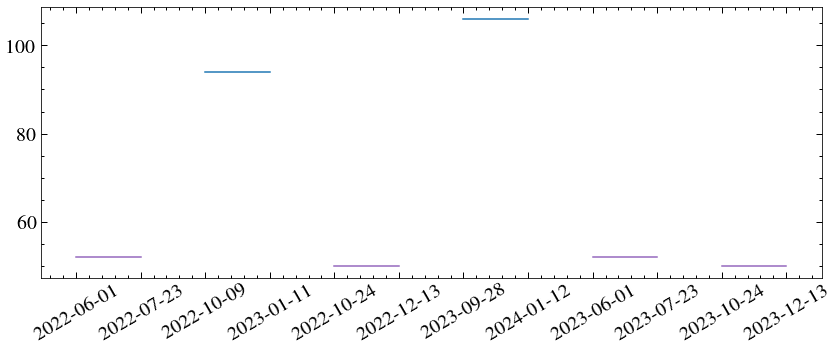

In [8]:
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)


import datetime
start_cut = start[4:]
end_cut = end[4:]
dur_cut = jvis['Duration'][4:]
fig, ax = plt.subplots()

for i in range(len(start_cut)):
    ax.plot([start_cut[i].iso, end_cut[i].iso], [dur_cut[i], dur_cut[i]], ls='-', c='C4', label = 'JWST')
    if i < 2:
        ax.plot([t1_starts[i].iso, t1_ends[i].iso], [t1_durs[i], t1_durs[i]], c='C0', label ='HST')
        
        
 
        
# for i in range(len(t1_starts)):
    # ax.plot_date([t1_starts[i].iso, t1_ends[i].iso], [t1_durs[i], t1_durs[i]])
# limits = Time(('2022-04-01', '2023-12-31'), format='iso',out_subfmt='date', scale='utc')
# ax.set_xlim(limits[0].iso, limits[1].iso)

labels = ax.get_xticklabels()
for label in labels:
                label.set_rotation(30)

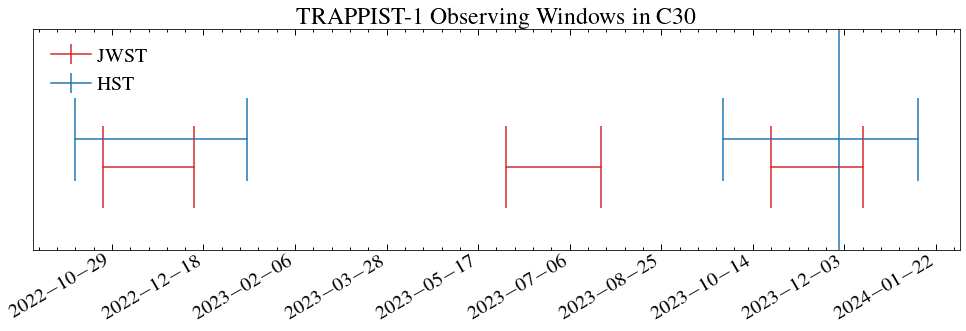

In [9]:
import matplotlib.dates as mdates
from datetime import datetime
 
fig, ax=plt.subplots()
    
jstart = [datetime.strptime(d, "%Y-%m-%d") for d in jvis['Start'][5:]]
jend = [datetime.strptime(d, "%Y-%m-%d") for d in jvis['End'][5:]]

for i in range(len(jstart)):
    # if i == :
        plt.errorbar([jstart[i], jend[i]], [1, 1], yerr=0.15, label = 'JWST', c='C3' )
    # else
        # plt.plot([jstart[i], jend[i]], [1, 1], c='C4' )
    
hstart = [datetime.strptime(d, "%Y-%m-%d") for d in ['2022-10-09', '2023-09-28']]
hend = [datetime.strptime(d, "%Y-%m-%d") for d in ['2023-01-11', '2024-01-12']]

for i in range(len(hstart)):
    plt.errorbar([hstart[i], hend[i]], [1.1, 1.1], yerr=0.15, label='HST', c='C0')
    # plt.annotate('{}'.format(t1_durs), , 1.2), xycoords='data')
    
# plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.ylim(0.7, 1.5)
plt.axvline(datetime.strptime('2023-11-30', "%Y-%m-%d"))

# plt.yticks(visible=False)
ax.yaxis.set_visible(False)
plt.title('TRAPPIST-1 Observing Windows in C30')
plt.tight_layout()

plt.savefig('t1_obs_windows.png', facecolor='w')


In [10]:
49*60

2940